## GMM na danych 1D, 2D i 3D

### 1D

In [50]:
# importujemy potrzebne biblioteki

from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


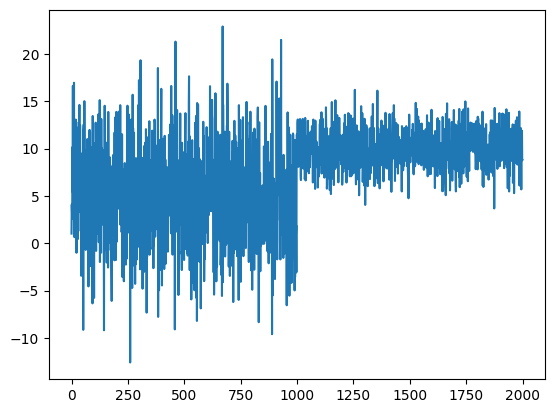

In [51]:
# tworzymy dane dobre do zademonstrowania GMM i łączymy

x = np.concatenate((np.random.normal(5, 5, 1000), np.random.normal(10, 2, 1000)))
plt.plot(x)

In [52]:
f = x.reshape(-1,1)

In [53]:
# przedstawmy ten zbiór danych jako kombinację trzech

g = mixture.GaussianMixture(n_components=3,covariance_type='full')
g.fit(f)

GaussianMixture(n_components=3)

In [54]:
weights = g.weights_
means = g.means_
covars = g.covariances_

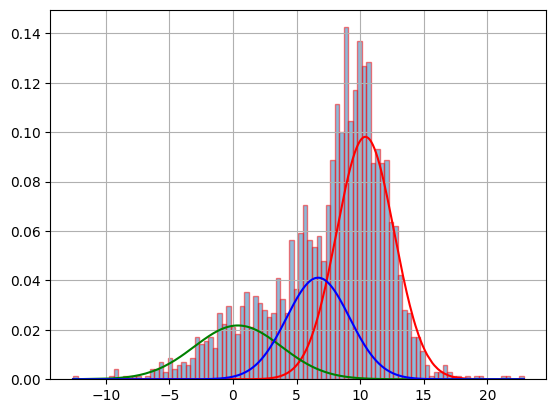

In [55]:
# sporządzenie wykresu

x_axis = x
x_axis.sort()

plt.hist(f, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)
plt.plot(x_axis,weights[0]*stats.norm.pdf(x_axis,means[0],np.sqrt(covars[0])).ravel(), c='red')
plt.plot(x_axis,weights[1]*stats.norm.pdf(x_axis,means[1],np.sqrt(covars[1])).ravel(), c='green')
plt.plot(x_axis,weights[2]*stats.norm.pdf(x_axis,means[2],np.sqrt(covars[2])).ravel(), c='blue')

plt.grid()
plt.show()

### 2D

In [56]:
# import biblioteki

from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture as GMM

In [57]:
# generujemy dane

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)

# odwracamy osie dla lepszej wizualizacji

X = X[:, ::-1]

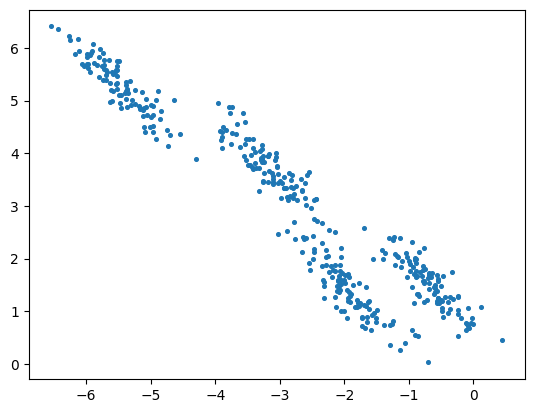

In [68]:
# rozciągamy nasze blobs

rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s=7)

In [59]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)

In [60]:
# kod do wykresu z https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # konwersja kowariancji na osie główne
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # rysowanie elipsy
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=7, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

<ipython-input-60-218a865a9dc0>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


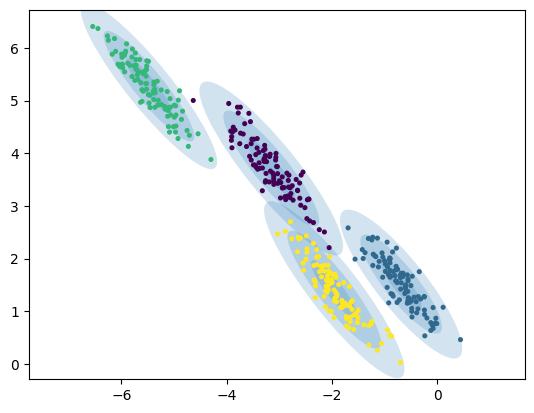

In [61]:
plot_gmm(gmm, X_stretched)

### 3D


In [62]:
# generujemy dane 3D z 4 klastrami

means = np.array([[0.5, 0.0, 0.0],
                      [0.0, 0.0, 0.0],
                      [-0.5, -0.5, -0.5],
                      [-0.8, 0.3, 0.4]])

covs = np.array([np.diag([0.01, 0.01, 0.03]),
                     np.diag([0.08, 0.01, 0.01]),
                     np.diag([0.01, 0.05, 0.01]),
                     np.diag([0.03, 0.07, 0.01])])

n_gaussians = means.shape[0]

In [63]:
# generujemy 1000 data points

N = 1000
points = []
for i in range(len(means)):
    x = np.random.multivariate_normal(means[i], covs[i], N )
    points.append(x)
points = np.concatenate(points)


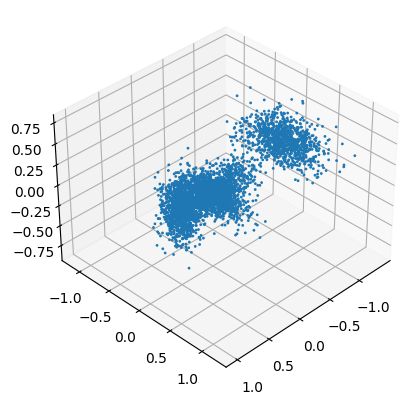

In [64]:
# wykres

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, alpha=1)
ax.view_init(35.246, 45)
plt.show()

In [65]:
# modelowanie

gmm = GMM(n_components=n_gaussians, covariance_type='diag')
gmm.fit(points)

GaussianMixture(covariance_type='diag', n_components=4)

In [66]:
# wizualizacja 3d
# https://github.com/sitzikbs/gmm_tutorial

import matplotlib.cm as cmx

def plot_sphere(w=0, c=[0,0,0], r=[1, 1, 1], subdev=10, ax=None, sigma_multiplier=3):
    '''
        plot a sphere surface
        Input:
            c: 3 elements list, sphere center
            r: 3 element list, sphere original scale in each axis ( allowing to draw elipsoids)
            subdiv: scalar, number of subdivisions (subdivision^2 points sampled on the surface)
            ax: optional pyplot axis object to plot the sphere in.
            sigma_multiplier: sphere additional scale (choosing an std value when plotting gaussians)
        Output:
            ax: pyplot axis object
    '''

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:complex(0,subdev), 0.0:2.0 * pi:complex(0,subdev)]
    x = sigma_multiplier*r[0] * sin(phi) * cos(theta) + c[0]
    y = sigma_multiplier*r[1] * sin(phi) * sin(theta) + c[1]
    z = sigma_multiplier*r[2] * cos(phi) + c[2]
    cmap = cmx.ScalarMappable()
    cmap.set_cmap('jet')
    c = cmap.to_rgba(w)

    ax.plot_surface(x, y, z, color=c, alpha=0.2, linewidth=1)

    return ax

def visualize_3d_gmm(points, w, mu, stdev):
    '''
    plots points and their corresponding gmm model in 3D
    Input:
        points: N X 3, sampled points
        w: n_gaussians, gmm weights
        mu: 3 X n_gaussians, gmm means
        stdev: 3 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''

    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # wizualizacja danych
    fig = plt.figure(figsize=(8, 8))
    axes = fig.add_subplot(111, projection='3d')
    axes.set_xlim([-1, 1])
    axes.set_ylim([-1, 1])
    axes.set_zlim([-1, 1])
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = range(i * N, (i + 1) * N)
        axes.scatter(points[idx, 0], points[idx, 1], points[idx, 2], alpha=0.3, c=colors[i])
        plot_sphere(w=w[i], c=mu[:, i], r=stdev[:, i], ax=axes)

    plt.title('3D GMM')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    axes.set_zlabel('Z')
    axes.view_init(35.246, 45)
    plt.show()

<ipython-input-66-6b3d8e27ed8b>:61: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes.scatter(points[idx, 0], points[idx, 1], points[idx, 2], alpha=0.3, c=colors[i])


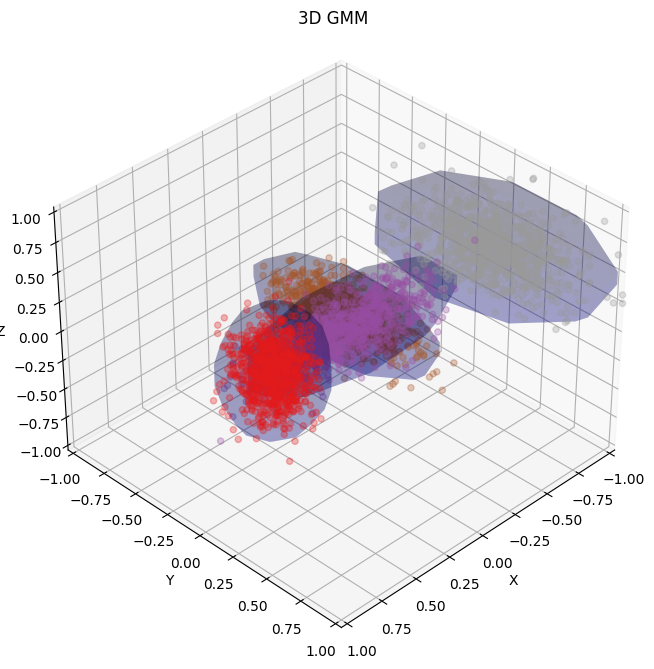

In [67]:
# wielki finał

visualize_3d_gmm(points, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T)